In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier

In [84]:
merged_data = pd.read_csv("merged_data.csv")
print(merged_data.shape)
print(merged_data.columns)
merged_data.head(20)

(2467, 12)
Index(['Unnamed: 0', 'Date', 'neg', 'neu', 'pos', 'compound', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')


,Unnamed: 0,Date,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume
0,0,2001-01-02,0.096756,0.831279,0.071965,-0.018231,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,1,2001-01-03,0.100805,0.812244,0.086976,-0.014800,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2,2001-01-04,0.076235,0.838464,0.085294,0.009842,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,3,2001-01-05,0.098810,0.772841,0.128333,0.028646,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,4,2001-01-08,0.098348,0.819682,0.081970,-0.055812,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0
5,5,2001-01-09,0.126143,0.830099,0.043758,-0.088437,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0
6,6,2001-01-10,0.262500,0.737500,0.000000,-0.221975,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0
7,7,2001-01-11,0.102500,0.821000,0.076500,0.000000,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0.0
8,8,2001-01-23,0.036823,0.899871,0.063306,0.024994,4277.830078,4321.750000,4272.870117,4296.689941,4296.689941,0.0
9,9,2001-01-24,0.084511,0.811844,0.103622,0.012122,4320.509766,4339.410156,4295.709961,4326.419922,4326.419922,0.0


In [85]:
merged_data=merged_data.drop(['Unnamed: 0'],axis=1)

In [86]:
merged_data.head()

,Date,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,0.096756,0.831279,0.071965,-0.018231,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0
1,2001-01-03,0.100805,0.812244,0.086976,-0.014800,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0
2,2001-01-04,0.076235,0.838464,0.085294,0.009842,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0
3,2001-01-05,0.098810,0.772841,0.128333,0.028646,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0
4,2001-01-08,0.098348,0.819682,0.081970,-0.055812,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0


In [87]:
label=[]
for i in merged_data.index:
    if merged_data['Open'][i]>=merged_data['Close'][i]:
        label.append('1')
    else:
        label.append('0')
print(label)

['0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0',

In [88]:
label=pd.DataFrame(label)

In [89]:
merged_data['label']=label
merged_data.head(20)

,Date,neg,neu,pos,compound,Open,High,Low,Close,Adj Close,Volume,label
0,2001-01-02,0.096756,0.831279,0.071965,-0.018231,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0.0,0
1,2001-01-03,0.100805,0.812244,0.086976,-0.014800,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0.0,0
2,2001-01-04,0.076235,0.838464,0.085294,0.009842,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0.0,1
3,2001-01-05,0.098810,0.772841,0.128333,0.028646,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0.0,0
4,2001-01-08,0.098348,0.819682,0.081970,-0.055812,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0.0,1
5,2001-01-09,0.126143,0.830099,0.043758,-0.088437,4114.740234,4166.839844,4101.009766,4125.310059,4125.310059,0.0,0
6,2001-01-10,0.262500,0.737500,0.000000,-0.221975,4151.580078,4155.859863,4035.439941,4047.639893,4047.639893,0.0,1
7,2001-01-11,0.102500,0.821000,0.076500,0.000000,4066.129883,4077.540039,4006.540039,4027.129883,4027.129883,0.0,1
8,2001-01-23,0.036823,0.899871,0.063306,0.024994,4277.830078,4321.750000,4272.870117,4296.689941,4296.689941,0.0,0
9,2001-01-24,0.084511,0.811844,0.103622,0.012122,4320.509766,4339.410156,4295.709961,4326.419922,4326.419922,0.0,0


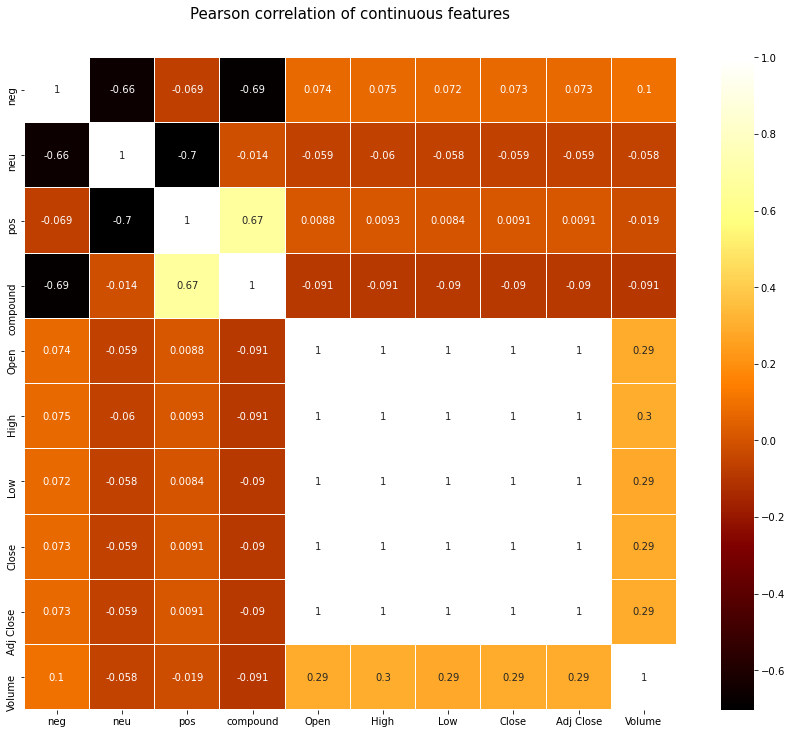

In [90]:
from matplotlib import pyplot
import seaborn as sns
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_data.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

In [91]:
#Storing attribute values in X and target values in Y
X = merged_data.values[:, 1:10] 
Y = merged_data.values[:, 11:12] 

In [92]:
#Spliting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

In [93]:
X_train.shape

(1726, 9)

In [94]:
X_test.shape

(741, 9)

In [95]:
y_test.shape

(741, 1)

# Logistic Regression

In [96]:
lr = LogisticRegression()
lr.fit(X_train, y_train.ravel())
lr.score(X_test, y_test)

0.9986504723346828

In [97]:
y_test.shape

(741, 1)

In [98]:
# prepare the model LR
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_lr = LogisticRegression()
model_lr.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_lr.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))


accuracy score:
0.8299595141700404
confusion matrix: 
[[306  61]
 [ 65 309]]
classification report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       367
           1       0.84      0.83      0.83       374

    accuracy                           0.83       741
   macro avg       0.83      0.83      0.83       741
weighted avg       0.83      0.83      0.83       741



C:\Users\shahp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
y_true=y_test
y_true= '1' <= y_true
print(y_true) # [False  True False False  True  True  True  True  True]

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 

roc auc is :0.9966777892727564


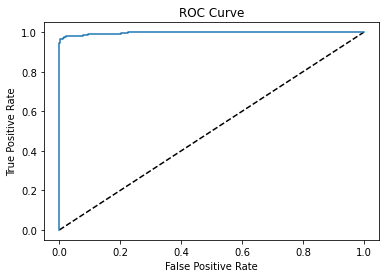

In [100]:

# Generating the ROC curve
y_pred_proba = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

Feature: 0, Score: 0.03685
Feature: 1, Score: -0.01907
Feature: 2, Score: 0.00750
Feature: 3, Score: -0.02995
Feature: 4, Score: 8.12671
Feature: 5, Score: 1.96779
Feature: 6, Score: 0.42341
Feature: 7, Score: -5.26842
Feature: 8, Score: -5.26842


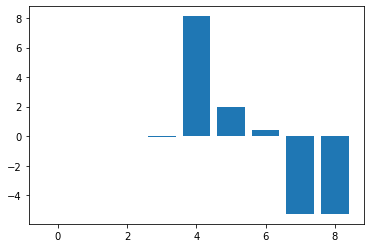

In [114]:
importance = model_lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


In [157]:
pca_df = pd.DataFrame(transformed)
pca_df.shape


(2467, 5)

In [158]:
X_train_pca, X_test_pca = pca_df.loc[0:1725, :], pca_df.loc[1726:2467, :]

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))

Score is 0.4993252361673414


C:\Users\shahp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Support Vector Machine

In [101]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train.ravel())
svm.score(X_test, y_test)

0.5141700404858299

# Random Forest Classifier

In [102]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)

0.6437246963562753

# XGBoost Classifier

In [103]:
XGBoost= XGBClassifier()
XGBoost.fit(X_train, y_train.ravel())
XGBoost.score(X_test, y_test)

0.7597840755735492

In [104]:
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

C:\Users\shahp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy score:
0.7597840755735492
confusion matrix: 
[[293  74]
 [104 270]]
classification report: 
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       367
           1       0.78      0.72      0.75       374

    accuracy                           0.76       741
   macro avg       0.76      0.76      0.76       741
weighted avg       0.76      0.76      0.76       741



roc auc is :0.4957233822436579


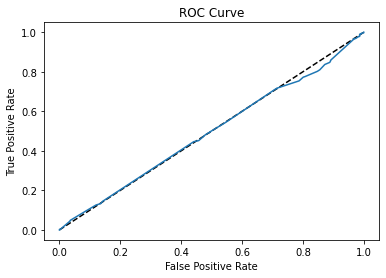

In [105]:
# Generating the ROC curve
y_pred_proba = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

Feature: 0, Score: 0.08902
Feature: 1, Score: 0.10519
Feature: 2, Score: 0.10308
Feature: 3, Score: 0.10323
Feature: 4, Score: 0.15100
Feature: 5, Score: 0.11593
Feature: 6, Score: 0.11893
Feature: 7, Score: 0.21363
Feature: 8, Score: 0.00000


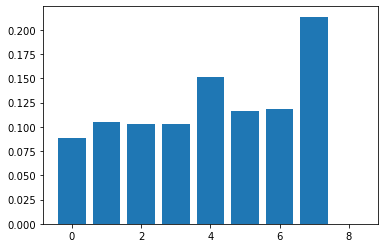

In [117]:
# get importance
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.5384615384615384 at depth of 1 and estimator 150


C:\Users\shahp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Score is 0.7017543859649122 at depth of 2 and estimator 150
Score is 0.6963562753036437 at depth of 3 and estimator 150
Score is 0.7530364372469636 at depth of 4 and estimator 150
Score is 0.7246963562753036 at depth of 5 and estimator 150
Score is 0.7678812415654521 at depth of 6 and estimator 150
Score is 0.7557354925775979 at depth of 7 and estimator 150
Score is 0.757085020242915 at depth of 8 and estimator 150
Score is 0.7246963562753036 at depth of 9 and estimator 150
Score is 0.7462887989203779 at depth of 10 and estimator 150
Score is 0.7300944669365722 at depth of 11 and estimator 150
Score is 0.7462887989203779 at depth of 12 and estimator 150
Score is 0.5560053981106613 at depth of 1 and estimator 200
Score is 0.7058029689608637 at depth of 2 and estimator 200
Score is 0.7206477732793523 at depth of 3 and estimator 200
Score is 0.7638326585695007 at depth of 4 and estimator 200
Score is 0.7368421052631579 at depth of 5 and estimator 200
Score is 0.7719298245614035 at depth o

roc auc is :0.8163750018213873


<ipython-input-164-22f1700171f3>:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pyplot.show()


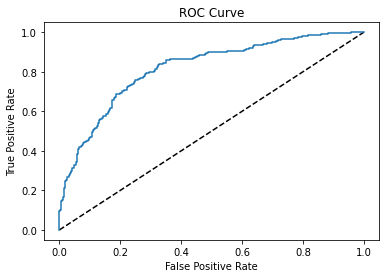

In [164]:
# Generating the ROC curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# KNN Classifier

In [106]:
KNN =KNeighborsClassifier()
KNN.fit(X_train, y_train.ravel())
KNN.score(X_test, y_test)

0.8529014844804319

In [107]:
model_knn = KNeighborsClassifier()
model_knn.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_knn.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

accuracy score:
0.5155195681511471
confusion matrix: 
[[192 175]
 [184 190]]
classification report: 
              precision    recall  f1-score   support

           0       0.51      0.52      0.52       367
           1       0.52      0.51      0.51       374

    accuracy                           0.52       741
   macro avg       0.52      0.52      0.52       741
weighted avg       0.52      0.52      0.52       741



<ipython-input-107-20b18688dc07>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model_knn.fit(rescaledX, y_train)


roc auc is :0.5


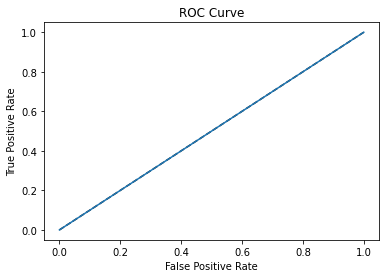

In [108]:
# Generating the ROC curve
y_pred_proba = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

In [109]:
NB=GaussianNB()
NB.fit(X_train, y_train.ravel())
NB.score(X_test, y_test)

0.5087719298245614

In [110]:
CART= DecisionTreeClassifier()
CART.fit(X_train, y_train.ravel())
CART.score(X_test, y_test)

0.6788124156545209